Activity for Supervised Learning using the K-Nearest Neigbour Algorithm

In [1]:
#Importing all the neccessary tools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sn
import numpy as np

In [2]:
### Load Data From CSV File  
df = load_iris()

# create features and labels response
predictor = df.data
labels = df.target

In [3]:
# STEP 1: split features and  labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictor, labels, test_size=0.3, random_state=4)

In [4]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_true = knn.predict(X_train)
print('train accurancy: {}'.format(metrics.accuracy_score(y_train, y_true)))

print('test accurancy: {}'.format(metrics.accuracy_score(y_test, y_pred)))

train accurancy: 1.0
test accurancy: 0.9555555555555556


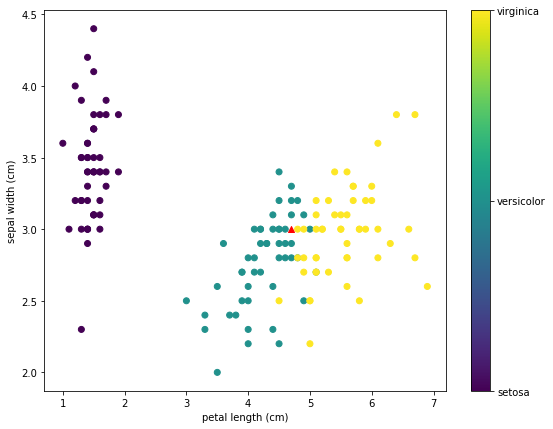

In [5]:
x_index = 2
y_index = 1
np.random.seed(33)
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: df.target_names[int(i)])

plt.figure(figsize=(9, 7))
plt.scatter(df.data[:, x_index], df.data[:, y_index], c=df.target)

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(df.feature_names[2])
plt.ylabel(df.feature_names[1])

#plt.tight_layout()
plt.scatter(4.7,3, marker='^',color = 'red')
plt.show()

Choosing the right value of K
In the general solution part of the dataset is set aside for testing the performance of the model. Start by choosing k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best accurancy of the model.

In [6]:
# try K=1 through K=10 and record testing accuracy
k_range = range(1, 10)

# We can create Python dictionary using [] or dict()
scores = []
_score_true = []

# We use a loop through the range 1 to 10
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_true = knn.predict(X_train)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    _score_true.append(metrics.accuracy_score(y_train, y_true))

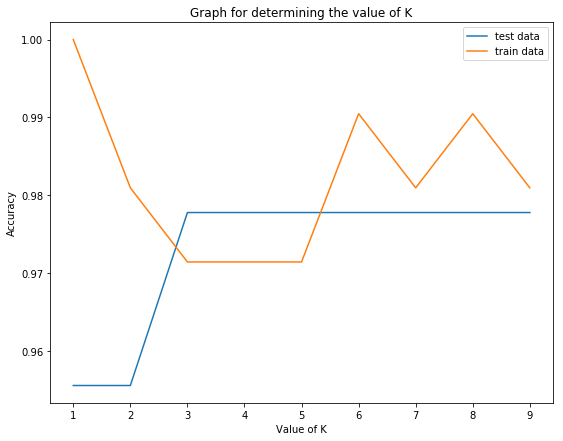

In [7]:
plt.figure(figsize=(9, 7))
plt.plot(k_range,scores,label="test data")
plt.plot(k_range,_score_true,label="train data")
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Graph for determining the value of K')
plt.legend()
plt.show()

In [8]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_true = knn.predict(X_train)
print('train accurancy: {}'.format(metrics.accuracy_score(y_train, y_true)))

print('test accurancy: {}'.format(metrics.accuracy_score(y_test, y_pred)))

train accurancy: 0.9904761904761905
test accurancy: 0.9777777777777777


In [10]:
_names = (df.target_names)
_class_report = pd.DataFrame(metrics.classification_report(y_test, y_pred,target_names=_names,output_dict=True))
_class_report =_class_report.drop('support',axis=0)
_report = _class_report[df.target_names]

In [11]:
_report

,setosa,versicolor,virginica
f1-score,1.0,0.947368,0.965517
precision,1.0,1.000000,0.933333
recall,1.0,0.900000,1.000000
